# (1) Introduction
This project was created for the sole purpose of trying to decode the ideal price of a phone given a specific set of features it has. This algorithm has various uses, for example, it can be used for determining the price category of an upcoming smartphone, based on its leaked features, or can help a smartphone startup determine what price the business must price their smartphones for or heck even try to find out if you, as the user had been scammed for the phone you currently own right now!!! This is a relatively simple algorithm focused more on the explanation side as I start my journey to **broadcast** all my projects for a free download for any user to use. Anyways lets begin!!!

Let's begin with the characteristics this algorithm sees fit. Mentioned below are the parameters (features) used to train this model.

Btw here is the **[dataset](https://www.kaggle.com/iabhishekofficial/mobile-price-classification)**.


## Independent Variables

---


1. Battery power (mAh).
2. Has bluetooth?
3. Microprocessor clock_speed (GHZ).
4. Has dual sim??
5. Mega Pixels of selfie camera.
6. Has 4G?
7. Memory (Gb).
8. Depth (cm).
9. Weight (g).
10. Number of cores.
11. Primary camera Mega Pixels.
12. Pixel Resolution Height (pix).
13. Pixel Resolution Width (pix).
14. RAM (Mb).
15. Height of screen (cm).
16. Width of screen (cm).
17. Longest time that a single battery charge will last (hrs).
18. Has 3G?
19. Is touck screen?
20. Has wifi?
---
Here is what we will be predicting.

## Dependent Vairable
1. Price range.


---

# (2) Importing the necessary libraries
Below is the description of libraries and their use

| Library      | Use |
| ----------- | ----------- |
| Numpy      | Used to deal with arrays (i.e advanced lists)      |
| Pandas   | Used to get the data from the CSV file "test.csv" & "train.csv"        |
| Matplotlib      | Used to plot graphs to add a visual sense to our algorithm      |
| Sklearn   | This is a massive library with a lot of sub-functions but the one we imported was the **StandardScaler** module which basically used for formatting data into a more consistent form. We will revisit this later down the road |
| Keras.models.Sequential      |    This library is used to initialise a framework into which we can add/customize our own neural network   |
| Keras.layers.Dense     |    This library is used to initialize a new basic node into a neural network   |
| Keras.layers.Dropout     |    This library is used to add dropout (will be explained later)  |

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout

# (3) Data preprocessing
This is a crucial step for any machine learning algorithm as every library or algorithm has its own prerequisites if you will, that is, each algorithm has a different set of format. Just look out for them before you build any model. The b/m code cell deals with the extraction and the reformatting of data. The hash-tag after each line explains what each individual line of code does. An example is provided below.

```
code # Explanation provided
```
Lets see what the b/m code cell means
 

## (3a) Extracting the data & formatting it

In [ ]:
dataset = pd.read_csv("train.csv") # Getting the data from the "train.csv excel sheet"
features = dataset.iloc[:, :-1].values # Extracting every row but the last one & converting it to an array (Getting the features)
price_range = dataset.iloc[:, -1].values # Extracting the last last column & converting it to an array (Getting the price range)
price_range = np.array(price_range).reshape(-1, 1) # Formatting the data from a 1d array to a 2d one for it to be fitted into the model

## (3b) Applying a Standard Scaler
The [Standard Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) function is applied to the ***training set***, which is referred as features in this algorithm. Its purpose is to scale all the data into a more uniform "range" i.e many datasets will have one parameter having a range from (1000 - 10000) and another one from (0.01 - 0.1). This is dangerous while training as when some ***mathematical functions*** are applied the inconsistency can ruin the balance of the [weights](https://) which we will get into when I explain the model to you in upcomming sections.

In [ ]:
scaler = StandardScaler() # Initializing the scaler object
features = scaler.fit_transform(features) # Fitting the scaler into the training_set (A.K.A  features)

# (4) The Artificial Neural Network (ANN)

## (4a) An Introduction
Artificial neural networks abbreviated as ANNs is the backbone of this project. The main motive of the ANN is to behave like the human brain, i.e construct a structure that replicates the anatomy of the human brain. Its structure consists of **nodes** (representing a neuron in the human brain) connected with other nodes via a connection called a **synapse**. Each node represents a feature of the problem we are trying to solve (i.e a parameter). For example, if I am trying to predict the future price of a house a **feature** will be considered as the age or the geographic location of the house. The more the parameters, the more the nodes and the higher the precision of the model when it comes to real-life usage. Below, there is an example of a representation of an artificial neural network. The image below represents **3 layers**, the **input**, **hidden**, and an **output** layer. Each node in the input layer represents a feature and each node in the hidden layer handles the feature of the similarities between the 2 input node. For example the location of the house and how often it rains or snows in that location. The main purpose of the hidden nodes is to find a **relationship** between the nodes being input which helps later predicting what factors contribute to the overall prediction.

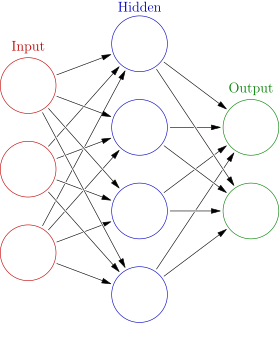

In [ ]:
nn = Sequential()

### Code explanation
In the above code section, I am initializing the backbone of the neural network, kind of like how 2 slices of bread are in a sandwich, within the two slices of bread we can add anything we want in order to make it into a sandwich of your liking. Same is true for the above example we will be adding these so-called ***nodes*** into the back-bone of the architecture later down into the project.

## 4(b) Weights, What are they??
Machine learning is all about mathematics, even if you are trying to make a translator or an image detection algorithm, be it via [NLP](https://en.wikipedia.org/wiki/Natural_language_processing) or [CNNs](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53), the **words** or the **pixels** in the sample is converted to an array of numbers that are later fed into the neural network for it to train. Knowing this, you wouldn't be surprised that the **weight** is just a number that represents the strength of the connection between 2 nodes. If the feature that the node has strongly co-relates with the next recurring nodes its weight connection will be stronger. Weights are changed and fine-tuned as the model is trained to help it ***learn*** what features are important and what isn't. This is what makes the model more and more accurate into predicting what features to consider and discard. When trained over hundreds or sometimes even millions of datasets the machine automatically has more experience helping it predict the values more properly. If you are having a challenging time visualising what the neural network will nook like with weights, here is an image example.

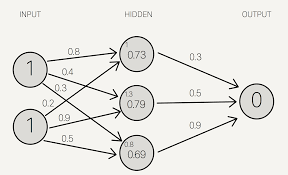

## 4(c) Activation Functions
This section covers the activation function. The activation function is the function each node contains that computes the result of the input from the previous node. For example
```
prev_node_input = 5
activation_function = f(x)
the_output_of_the_current_node = f(prev_node_input)
``` 
This might sound confusing but just think of the activation function as the **brain** of the node, the brain of the brain if you will. **Mathematical functions** take the place of activations. Popular ones include **ReLU**, **sigmoid**, **tanh**. We won't go into the details of activation functions but there will be some small explanations of the activation functions for we will be using to construct this model.



### 4(c)(i) The Rectified Linear Unit Function (ReLU)
This is an example of an activation function that is mainly used in hidden and output nodes. Below is a graphical representation of the activation function.


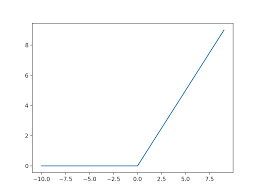

### 4(c)(ii) The Softmax Function
This function is used for a classification problem. Picture this, you are given an image and you want to classify whether its a cat or a dog or a horse. The function of the neural network is to spit out numbers. However, despite making sense to the neural network, it makes no sense to us or even to the computer for that matter. The softmax function solves this problem by taking the values and converting them into **probabilities** (values between 0 &1). These values are evaluated and the maximum value, probability, is chosen which then labels these images. An example is illustrated below.
## New section
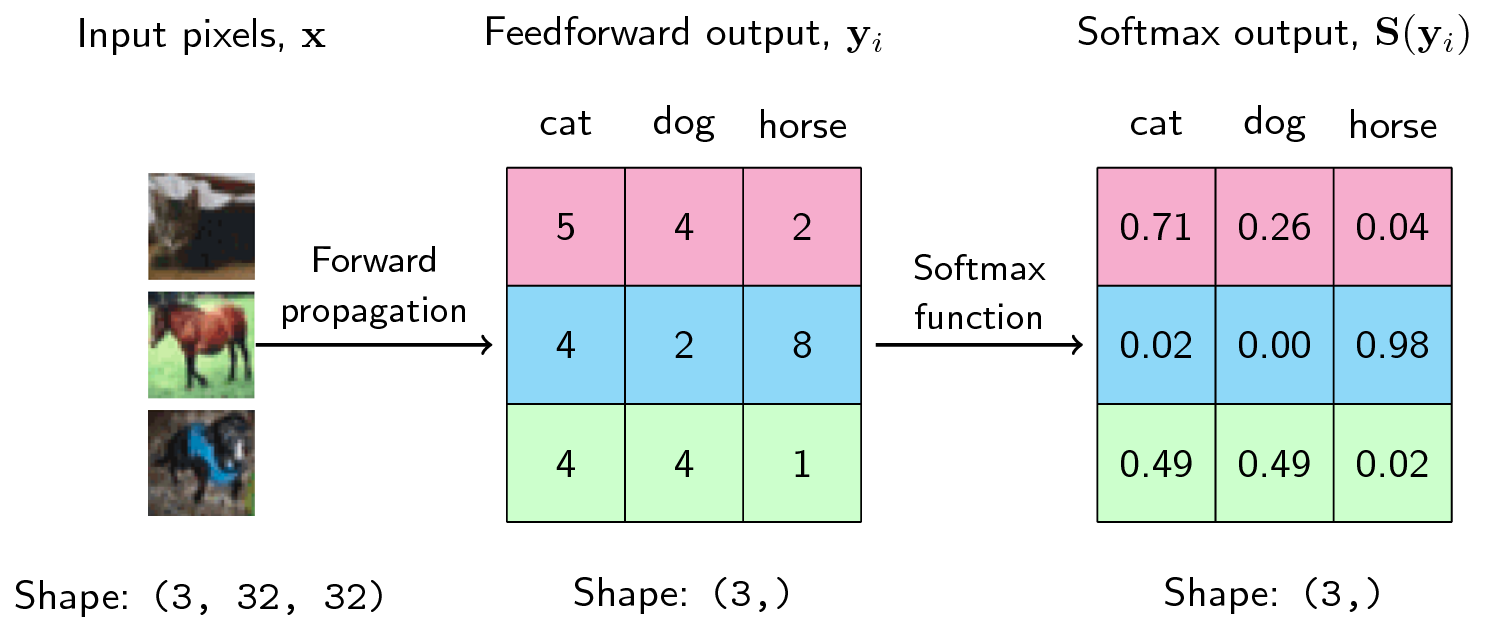

## 4(d) Stochastic Gradient Descent
Stochastic gradient descent referred to as **adam** in this code is the process through which the model is trained. It keeps count of the **cost function**, which is basically the error computed by calculating the difference between the actual value and the predicted value. The aim of the model is to always minimize the **cost**. Stochastic gradient descent represents the process of minimizing the gradient by **descending** the ***cost vs weight graph*** **gradient**. The weights are adjusted and trained, as a result, to output values having the lowest cost function. The graph below represents the **descent**.

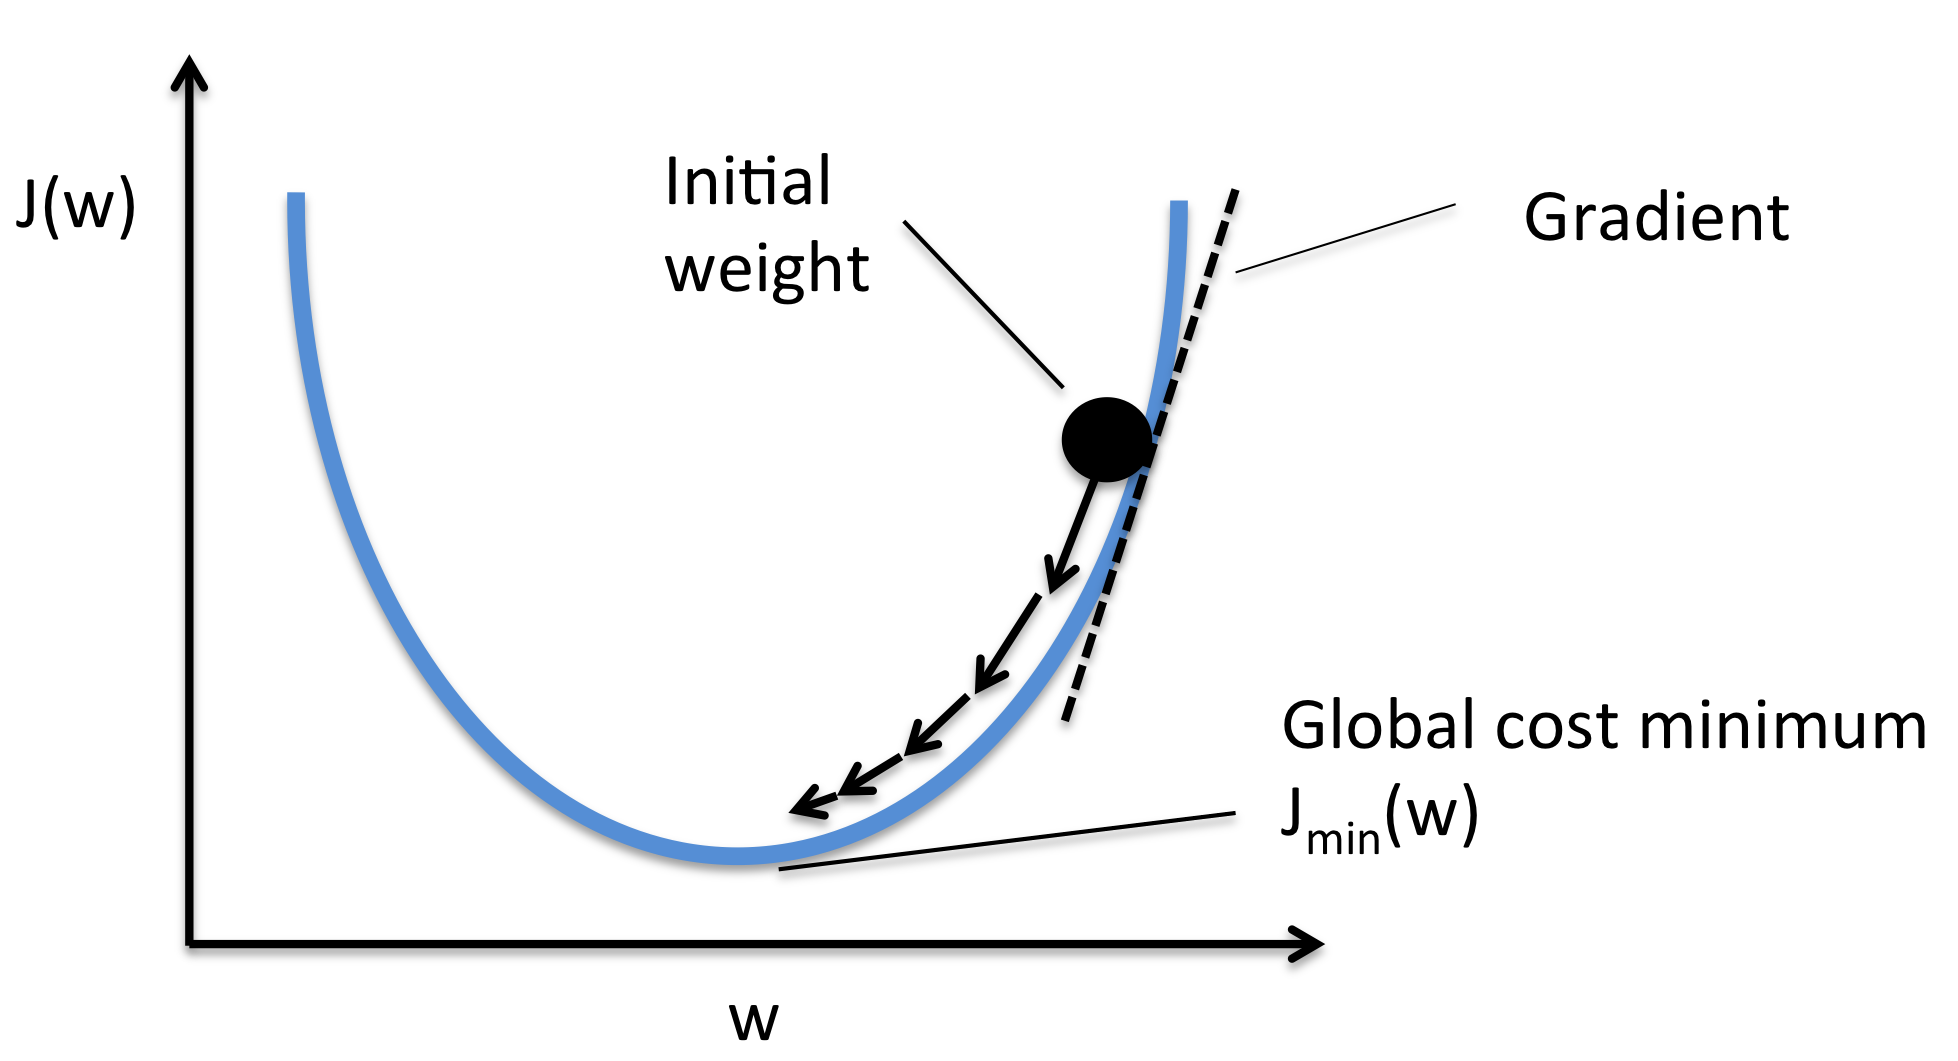

## 4(e) The code

In [ ]:
# Units is the number of nodes in the particular layer
nn.add(Dense(units=150, activation='relu')) # Adding a layer (input layer)
nn.add(Dense(units=75, activation='relu'))
nn.add(Dropout(rate=0.2))
nn.add(Dense(units=40, activation='relu'))
nn.add(Dense(units=20, activation='relu'))
nn.add(Dropout(rate=0.2))
nn.add(Dense(units=4, activation='softmax'))
nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # loss is same as cost
  # metrics is used to print the accuracy to the terminal
nn.fit(features, price_range, batch_size=50, epochs=10) # Fitting the dependent and independent variables

### 4(e)(i) Droupout
You may have noticed this line:

```
nn.add(Dropout(rate=0.2))
```

and must have been wondering what that line does. Dropout is the concept of neglecting some neurons randomly as to avoid **overfitting**. Sometimes, when a model is trained it gets too dependent on the data it was trained on. This concept is known as overfitting. This is dangerous as any model that gets **"too dependent"** on its dataset won't be able to predict any sudden changes in the real-time stream data, or worse, real-time data might become alien to the model. This is why it's necessary to drop some neurons while training. That's also why the accuracy of a 100% is not ideal. This model has an **average accuracy** of **92%**.

# (5) Data postprocessing